# Topic modeling with Python and gensim

Be sure to install the following libraries with pip3 or pipenv (if you're using a virtual environment, as suggested) in the directory in which you plan to create your jupyter notebook to run the topic modeling code:
<ul>
    <li>gensim</li>
    <li>numpy</li>
    <li>pyLDAvis</li>
    <li>matplotlib</li>
</ul>

Have all the documents for which you want to create a topic model in the same folder, and know the path to that folder. You'll need to specify this path in the first step below.

In [2]:
#Before executing the following code, ensure that all documents are encoded at UTF-8.

#Set random seed for reproduction of code. 
import numpy as np
np.random.seed(42)

#Change working directory. 
import os
os.chdir("/Users/ashleysanders/Dropbox/01-Scholarship/VizHistory'sFragments/01-Manuscript_Materials/Data and Additional Materials/Ch2/BeysCorpus") 
all_files = os.listdir("/Users/ashleysanders/Dropbox/01-Scholarship/VizHistory'sFragments/01-Manuscript_Materials/Data and Additional Materials/Ch2/BeysCorpus")
all_files.sort()
all_files.pop(0)

#print(all_files)
len(all_files)

137

In [ ]:
# from nltk.corpus import stopwords

# stop_words = stopwords.words('french')

# print(stop_words)


In [25]:
import nltk
nltk.download('punkt')
from nltk import tokenize
from nltk.tokenize import word_tokenize 
import string

stopwords = open("/Users/ashleysanders/Dropbox/01-Scholarship/VizHistory'sFragments/01-Manuscript_Materials/Data and Additional Materials/Ch2/fr-stop-oa.txt").read()
stopwords_set=set(stopwords)

#Read each file into the working directory. Remove stop words, non-alphabetical terms, and punctuation. Append each processed file into the docs list. 
docs = []

for file in all_files:
    with open(file,'r') as f:
        text = f.read()        
        lines_list = tokenize.word_tokenize(text)
        lowered = [w.lower() for w in lines_list]
        alpha = [w for w in lowered if w.isalpha()]
        filtered = [w for w in alpha if w not in stopwords]
        stripped = list(filter(None, filtered))
        docs.append(stripped)

docs[:1]

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/ashleysanders/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


[['entretint',
  'bonnes',
  'relations',
  'feudataires',
  'soutint',
  'contingents',
  'janissaires',
  'cavaliers',
  'makhzen',
  'ali',
  'campagnes',
  'sultan',
  'maroc',
  'soutint',
  'expéditions',
  'espagnols',
  'remplaça',
  'tête',
  'pachalik',
  'géorgie',
  'bey',
  'rendit',
  'visite',
  'accompagné',
  'principaux',
  'feudataires',
  'porteur',
  'riches',
  'présents',
  'destinés',
  'principaux',
  'diwan',
  'haedo',
  'dit',
  'fils',
  'labez',
  'vint',
  'alger',
  'septembre',
  'féliciter',
  'nouvellement',
  'arrivé',
  'turquie',
  'offrir',
  'présent',
  'roubles',
  'valant',
  'écus',
  'espagne',
  'cents',
  'chameaux',
  'moutons']]

In [26]:
#The two main inputs to the LDA topic model are the dictionary and the corpus, 
#so we begin by creating the dictionary.

from gensim import corpora, models, similarities

#Create dictionary of words. 
dictionary = corpora.Dictionary(docs)

#View dictionary and see how many unique tokens it contains.
print(dictionary)
print(len(dictionary))

Dictionary<13681 unique tokens: ['accompagné', 'alger', 'ali', 'arrivé', 'bey']...>
13681


In [27]:
#In the next step, we will create the corpus for the LDA model.

#Create Term-Document Frequency, which also converts tokenized documents to vectors 
corpus = [dictionary.doc2bow(text) for text in docs]

#View
print(corpus[:1])

#Gensim creates a unique ID for each word in the document, and the resulting printout in the View step above,
#shows the mapping: (word_id, word_frequency), so (0,1) means that word ID 0 occurs once in the first document.

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 2), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 2), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 2), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1)]]


In [28]:
#If you want to see a word with a given ID, pass the ID as a key to the dictionary:
dictionary[0]

'accompagné'

In [29]:
#Human-readable format of corpus (term-frequency)
[[(dictionary[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('accompagné', 1),
  ('alger', 1),
  ('ali', 1),
  ('arrivé', 1),
  ('bey', 1),
  ('bonnes', 1),
  ('campagnes', 1),
  ('cavaliers', 1),
  ('cents', 1),
  ('chameaux', 1),
  ('contingents', 1),
  ('destinés', 1),
  ('dit', 1),
  ('diwan', 1),
  ('entretint', 1),
  ('espagne', 1),
  ('espagnols', 1),
  ('expéditions', 1),
  ('feudataires', 2),
  ('fils', 1),
  ('féliciter', 1),
  ('géorgie', 1),
  ('haedo', 1),
  ('janissaires', 1),
  ('labez', 1),
  ('makhzen', 1),
  ('maroc', 1),
  ('moutons', 1),
  ('nouvellement', 1),
  ('offrir', 1),
  ('pachalik', 1),
  ('porteur', 1),
  ('principaux', 2),
  ('présent', 1),
  ('présents', 1),
  ('relations', 1),
  ('remplaça', 1),
  ('rendit', 1),
  ('riches', 1),
  ('roubles', 1),
  ('septembre', 1),
  ('soutint', 2),
  ('sultan', 1),
  ('turquie', 1),
  ('tête', 1),
  ('valant', 1),
  ('vint', 1),
  ('visite', 1),
  ('écus', 1)]]

## Identify a reasonable number of topics to try based on coherence scores

In [30]:
#compute coherence scores first to determine which number(s) of topics produces the most coherent results.

from gensim.models.coherencemodel import CoherenceModel
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=1):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = models.LdaMulticore(corpus=corpus, num_topics=num_topics, id2word=dictionary, random_state = 100, passes = 25, chunksize = 100)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

In [31]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=docs, start=4, limit=30, step=1)

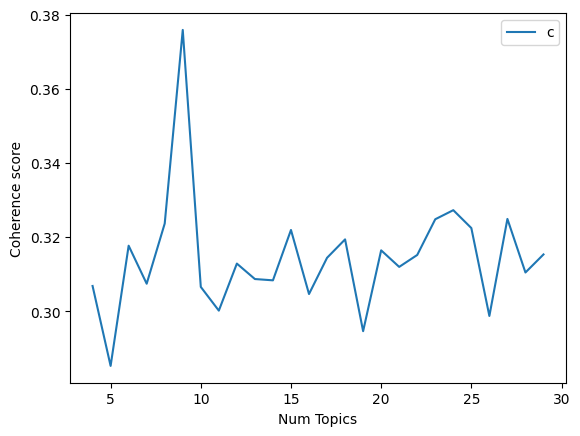

In [32]:
#Plot the graph of coherence scores across different number of topics (from 2 to 15).
import matplotlib.pyplot as plt
limit=30; start=4; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

### A 9-topic model seems to generate the best coherence scores.

In [36]:
#Parameter tuning will lead to different models. For this model, we use our corpus, dictionary, 
#set a random state of 100 (akin to setting a seed for reproduction purposes), 9 topics 
#(optimal number according to coherence scores), 100 passes (number of times the corpus is passed 
#through for training), and chunk size of 10 (number of documents to be used in each training chunk).

#See: https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/. 

# How to optimize the interval, as in mallet (http://mallet.cs.umass.edu/topics.php)?
# --optimize-interval [NUMBER] This option turns on hyperparameter optimization, 
#which allows the model to better fit the data by allowing some topics to be more prominent than others. 
#Optimization every 10-20 iterations is reasonable. 

lda_model = models.LdaMulticore(corpus=corpus,
                         id2word=dictionary,
                         random_state=100,
                         num_topics=9,
                         passes=100,
                         chunksize=10,
                         alpha="asymmetric"
                         )
lda_model.show_topics()

[(0,
  '0.014*"bey" + 0.010*"ben" + 0.008*"alger" + 0.005*"pacha" + 0.005*"fit" + 0.004*"tunis" + 0.004*"mort" + 0.004*"fils" + 0.004*"dey" + 0.004*"ville"'),
 (1,
  '0.017*"bey" + 0.006*"faire" + 0.006*"fit" + 0.005*"alger" + 0.005*"ahmed" + 0.004*"furent" + 0.004*"pacha" + 0.004*"ville" + 0.003*"tête" + 0.003*"province"'),
 (2,
  '0.009*"ben" + 0.007*"qacentina" + 0.005*"alger" + 0.004*"ahmed" + 0.004*"kaïd" + 0.003*"personnalités" + 0.003*"hadj" + 0.003*"bey" + 0.003*"hussein" + 0.003*"fit"'),
 (3,
  '0.004*"bey" + 0.003*"dey" + 0.003*"ben" + 0.003*"alger" + 0.003*"expédition" + 0.003*"maison" + 0.003*"camp" + 0.002*"mamlouk" + 0.002*"passage" + 0.002*"aurait"'),
 (4,
  '0.015*"bey" + 0.005*"alger" + 0.005*"furent" + 0.004*"ville" + 0.004*"fit" + 0.004*"faire" + 0.003*"kabiles" + 0.003*"colonne" + 0.003*"tunisiens" + 0.003*"dey"'),
 (5,
  '0.017*"bey" + 0.011*"alger" + 0.010*"tunis" + 0.008*"ali" + 0.007*"dey" + 0.005*"gouvernement" + 0.005*"armée" + 0.004*"algériens" + 0.004*"hosse

In [37]:
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
%matplotlib inline

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.112210  0.003115       1        1  35.492021
0      0.105098 -0.034113       2        1  31.492210
6      0.117618  0.074073       3        1  16.719121
4      0.088593  0.062069       4        1   9.082353
5      0.022738 -0.168636       5        1   4.063140
2     -0.108386  0.018819       6        1   2.056622
3     -0.096583  0.010893       7        1   0.672033
8     -0.115785  0.019579       8        1   0.393464
7     -0.125503  0.014203       9        1   0.029036, topic_info=           Term         Freq        Total Category  logprob  loglift
4           bey  1026.000000  1026.000000  Default  30.0000  30.0000
79          ben   365.000000   365.000000  Default  29.0000  29.0000
1         alger   438.000000   438.000000  Default  28.0000  28.0000
796       tunis   203.000000   203.000000  Default  27.0000  27.0000
226   qacentina    89.000000    89.000000  Default  26.0000  26.0000
...         ...          ...          ...      ...      ...      ...
3128   utiliser     0.001567     5.253672   Topic9  -9.5281   0.0270
4885     vallée     0.001567    10.742081   Topic9  -9.5282  -0.6884
1952  tardèrent     0.001567    10.384850   Topic9  -9.5283  -0.6546
6382       rôle     0.001567    11.515639   Topic9  -9.5283  -0.7580
2716    établit     0.001567    14.284587   Topic9  -9.5283  -0.9735

[668 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
3422      5  0.589422  abondamment
4534      1  1.006528         abus
4002      6  0.784348  acceptèrent
6932      4  0.926139     acharnée
2722      2  0.696044       acquit
...     ...       ...          ...
1725      2  0.408285        étape
1725      3  0.272190        étape
1725      6  0.136095        étape
7007      3  0.997910    étrangère
830       6  1.002260        œuvra

[1196 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 7, 5, 6, 3, 4, 9, 8])

### For other visualization options for topic models, see the sample code that ingests MALLET output and the following articles:

<ul>
    <li>Selva Prabhakaran, <a href="https://www.machinelearningplus.com/nlp/topic-modeling-visualization-how-to-present-results-lda-models/">"Topic Modeling Visualization - How to present the results of LDA models?"</a>, <em>Machine Learning Plus</em></li>
    <li>Selva Prabhakaran, <a href="https://www.machinelearningplus.com/nlp/topic-modeling-python-sklearn-examples/">"LDA in Python - How to grid search best topic models?"</a>, <em>Machine Learning Plus.</em> This article is particularly helpful when you're ready to explore the results of the topic model and the relationships between the topics and documents. It also provides guidance on ways to assess the the model's performance.</li>
</ul>

In [41]:
# Setting alpha to "auto" to compare results 

lda_model2 = models.LdaModel(corpus=corpus,
                         id2word=dictionary,
                         random_state=100,
                         num_topics=9,
                         passes=100,
                         chunksize=10,
                         alpha="auto"
                         )
lda_model2.show_topics()

[(0,
  '0.018*"bey" + 0.007*"alger" + 0.006*"fit" + 0.005*"ville" + 0.005*"ben" + 0.005*"faire" + 0.005*"pacha" + 0.004*"furent" + 0.004*"ahmed" + 0.003*"dey"'),
 (1,
  '0.042*"chef" + 0.041*"homme" + 0.035*"habitants" + 0.027*"peine" + 0.027*"venait" + 0.021*"règne" + 0.019*"envoya" + 0.018*"esprit" + 0.017*"loin" + 0.016*"mieux"'),
 (2,
  '0.000*"rangée" + 0.000*"piteusement" + 0.000*"respira" + 0.000*"rentrent" + 0.000*"rapportant" + 0.000*"saharien" + 0.000*"politesse" + 0.000*"gheris" + 0.000*"lancèrent" + 0.000*"suffisant"'),
 (3,
  '0.046*"makhzen" + 0.043*"cavaliers" + 0.042*"vint" + 0.026*"contingents" + 0.017*"chameaux" + 0.017*"bonnes" + 0.014*"accompagné" + 0.012*"offrir" + 0.009*"hammouda" + 0.009*"espagnols"'),
 (4,
  '0.000*"rangée" + 0.000*"piteusement" + 0.000*"respira" + 0.000*"rentrent" + 0.000*"rapportant" + 0.000*"saharien" + 0.000*"politesse" + 0.000*"gheris" + 0.000*"lancèrent" + 0.000*"suffisant"'),
 (5,
  '0.005*"montant" + 0.004*"confusion" + 0.000*"reportant"

In [42]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model2, corpus, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.251549  0.082763       1        1  96.390647
1      0.184773  0.134675       2        1   2.786806
3      0.029461 -0.116697       3        1   0.799702
5      0.006698 -0.018212       4        1   0.020715
7      0.006124 -0.016506       5        1   0.000429
6      0.006124 -0.016506       6        1   0.000429
8      0.006124 -0.016506       7        1   0.000425
2      0.006124 -0.016506       8        1   0.000424
4      0.006124 -0.016506       9        1   0.000424, topic_info=              Term       Freq      Total Category  logprob  loglift
289           chef  87.000000  87.000000  Default  30.0000  30.0000
1155         homme  84.000000  84.000000  Default  29.0000  29.0000
1154     habitants  73.000000  73.000000  Default  28.0000  28.0000
315          peine  56.000000  56.000000  Default  27.0000  27.0000
335         venait  56.000000  56.000000  Default  26.0000  26.0000
...            ...        ...        ...      ...      ...      ...
25         makhzen   0.000023  27.644643   Topic9  -9.5238  -1.6292
26           maroc   0.000023   1.710334   Topic9  -9.5238   1.1535
27         moutons   0.000023   3.678996   Topic9  -9.5238   0.3876
28    nouvellement   0.000023   0.324535   Topic9  -9.5238   2.8156
29          offrir   0.000023   7.354316   Topic9  -9.5238  -0.3051

[498 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
0         3  1.032169  accompagné
358       1  1.001314       ahmed
1         1  0.999320       alger
2         1  0.997601         ali
1147      2  0.998274     anciens
...     ...       ...         ...
335       2  0.997768      venait
280       1  0.999282       ville
46        3  0.998584        vint
47        3  1.089801      visite
48        3  1.387633        écus

[91 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 4, 6, 8, 7, 9, 3, 5])